# Import libraries and data into the notebook:

In [1]:
#basic imports:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#sklearn imports:
from sklearn.pipeline import Pipeline

# Feature extraction - CountVectorizer or TFidfVectorizer - "Term frequency, inverse document frequency":
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD

# Model selection:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve

# Feature selection:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2

# Models:
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier, SGDClassifier, LogisticRegression 
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Performance metrics:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve, RocCurveDisplay

# There are several approaches to cleaning the text and processing it as a "Bag-of-words"/tokenizing/vectorizing.
# Approach using the NLTK library and corpus:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Counter
from collections import Counter

# Regular expression and string imports:
import re
import string
from string import punctuation

# Set some styles to match other code repos for data visualization:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
# Load the data into raw, unprocessed dataframes:
df_fake_raw = pd.read_csv("C:/Users/JOAO/Desktop/CleanSlate/input/Fake.csv")
df_true_raw = pd.read_csv("C:/Users/JOAO/Desktop/CleanSlate/input/True.csv")

df_fake_raw["class"] = 0
df_true_raw["class"] = 1

dataset_size = [len(df_fake_raw),len(df_true_raw)]

# Concatenate both raw data into a single dataframe:
df_news_raw = pd.concat([df_fake_raw, df_true_raw],axis=0)
# Because date and subject are not linearly independent they will reduce model accuracy and induce redundant terms in our models. To avoid this remove these collumns:
df_news_lean = df_news_raw.drop(["subject","date"], axis=1)
# Concatenate the title with the remaining text:
df_news_lean["text"] = df_news_lean["title"] + df_news_lean["text"]
# Drop the title column:
df_news_text = df_news_lean.drop(["title"],axis=1)

# Random shuffling the dataframe:
data = df_news_text.sample(frac = 1)

# Reset the indexes of the dataframes, otherwise they would be doubled in the final data:
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

# Save this "curated" data to a .csv file:
data.to_csv('C:/Users/JOAO/Desktop/CleanSlate/input/Curated_data.csv')

([<matplotlib.patches.Wedge at 0x20ebdddbc10>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake News'),
  Text(1.1968726986325005, 0.08657796063754254, 'True News')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

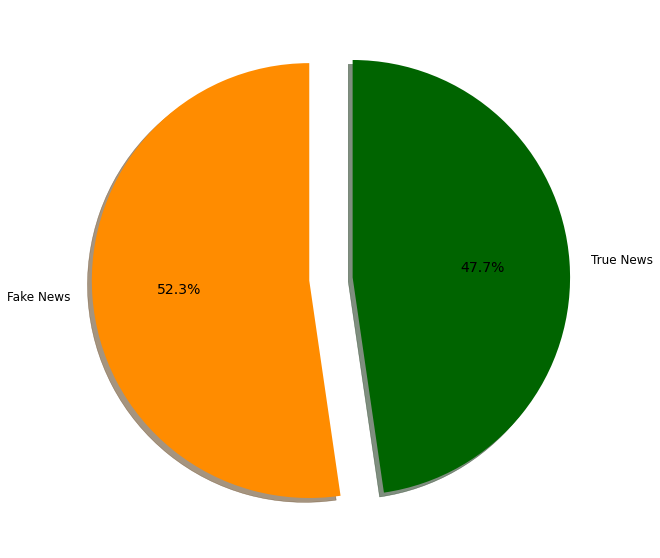

In [6]:
# Some data visualization:
plt.pie(dataset_size,explode=[0.1,0.1],colors=['darkorange','darkgreen'],startangle=90,shadow=True,labels=['Fake News','True News'],autopct='%1.1f%%')

# Data cleaning:

In [7]:
def nltk_process(data):
    # Tokenization
    # tokenList = word_tokenize(data)
    tk = WordPunctTokenizer()
    tokenList = tk.tokenize(data)
    
    # Convert the tokens into lowercase: lower_tokens
    lower_tokens = [t.lower() for t in tokenList]
    
    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    
    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmaList = []
    for word in alpha_only:
        lemmaList.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Stopwords
    filtered_words = []
    nltk_stop_words = set(stopwords.words("english"))
    for word in lemmaList:
        if word not in nltk_stop_words:
            filtered_words.append(word)
    
    # Remove punct.
    for word in filtered_words:
        if word in string.punctuation:
            filtered_words.remove(word)
    
    return filtered_words

In [8]:
%%time
if __name__ == "__main__":
    data["clean"] = [" ".join(text) for text in data["text"].apply(lambda x: nltk_process(x)).values]

Wall time: 2min 1s


In [9]:
# Do some manual checks of the clean text to verify if the lemmatization and puntuation removal was done right:
# print(data["clean"][44235])
# print()
# print(data["clean"][15000])
# print()
# print(data["clean"][10])
type(data["clean"])
print(data["clean"][4])
print()
print(data["text"][4])

watch obama perfectly mock trump insane followers think literal demonconservative radio show host alex jones recently proclaim president obama hillary clinton really demons send lucifer doubt mean metaphorically mean literally proof evil origins jones claim smell like sulphur hell apparently somebody mention president speak event campaign trail clinton obama decide give sniff test tuesday night check suspicious demonic odors demonize mean literally way read day guy radio apparently trump show frequently say hillary demons say smell like sulphur somethin president obama perform sniff test smell hand crowd laugh absurdity jones bullsh president begin burst laughter along crowd mean come people right wing nut job reduce us president sniff make sure actually f cking demon happen obama respond alex jones say hillary literal demons smell like sulfur sniff pic twitter com gsxrsklrdf colin jones colinjones october image via video screen capture

 WATCH: Obama PERFECTLY Mocks Trump’s Insane Fol

# Vectorization of the text data into numerical data

Including the train, test split after the vectorization.

In [10]:
%%time
X = data["clean"]
y = data["class"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=10000, test_size=0.1, shuffle=False)

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.7)

# Fit and Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

Wall time: 12.7 s


# MODEL TRAINING AND TESTING

## No cross validation, no optimization, no hyperparameter tuning!

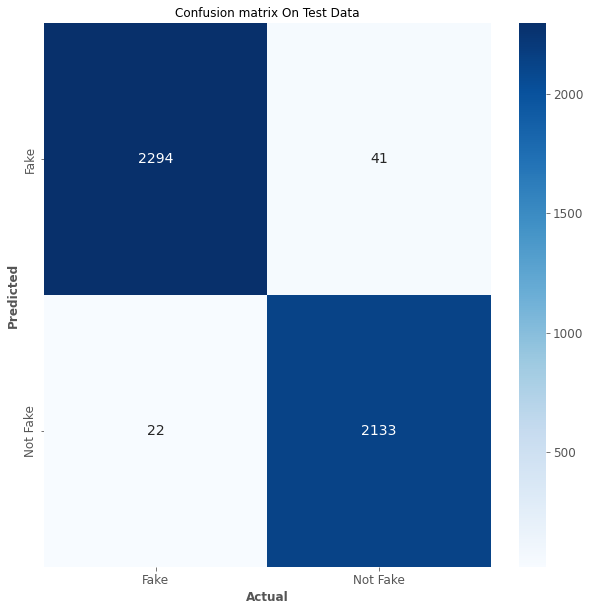

Accuracy: 98.6

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2335
           1       0.98      0.99      0.99      2155

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490

Wall time: 1.08 s


In [11]:
%%time
clf = SGDClassifier(penalty='elasticnet', alpha=0.000001, max_iter=1000)
clf.fit(tfidf_train, y_train)
y_pred_SDG = clf.predict(tfidf_test)

cm = confusion_matrix(y_test, y_pred_SDG)
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_SDG)*100,2)))
print()
print(classification_report(y_test, y_pred_SDG))

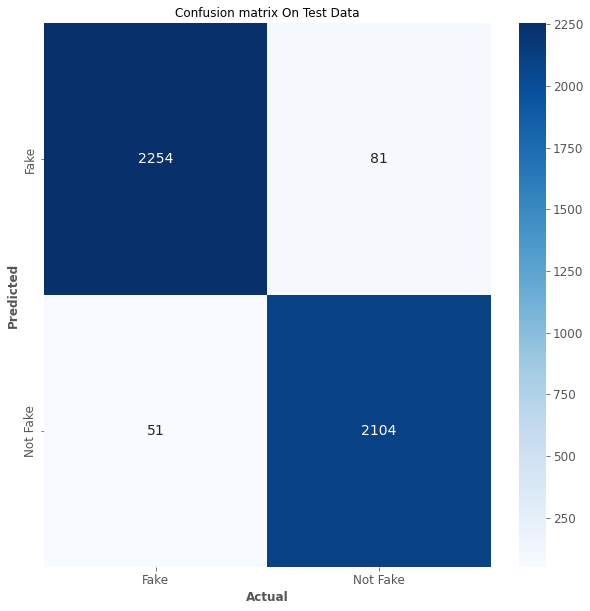

Accuracy: 97.06

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2335
           1       0.96      0.98      0.97      2155

    accuracy                           0.97      4490
   macro avg       0.97      0.97      0.97      4490
weighted avg       0.97      0.97      0.97      4490

Wall time: 7.39 s


In [12]:
%%time
classifier = LogisticRegression()
classifier.fit(tfidf_train, y_train)
y_pred_LR = classifier.predict(tfidf_test)
cm = confusion_matrix(y_test, y_pred_LR)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_LR)*100,2)))
print()
print(classification_report(y_test, y_pred_LR))

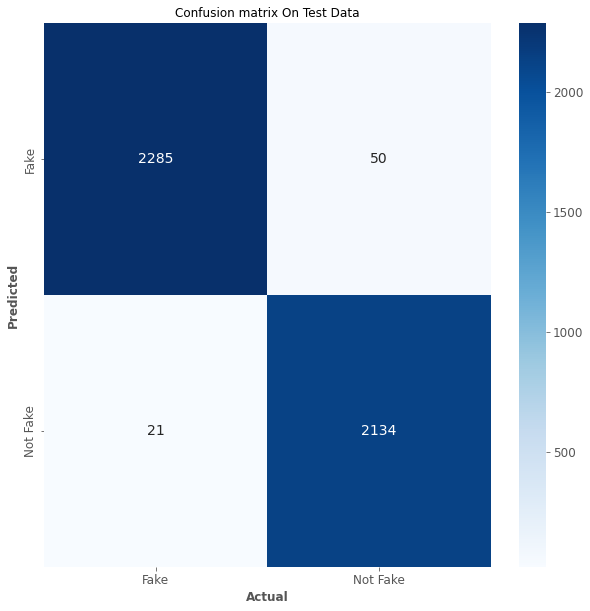

Accuracy: 98.42

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2335
           1       0.98      0.99      0.98      2155

    accuracy                           0.98      4490
   macro avg       0.98      0.98      0.98      4490
weighted avg       0.98      0.98      0.98      4490

Wall time: 1.12 s


In [13]:
%%time
clf_svc = LinearSVC(dual=True, max_iter=200)
clf_svc.fit(tfidf_train, y_train)
y_pred_SVC = clf_svc.predict(tfidf_test)

cm = confusion_matrix(y_test, y_pred_SVC)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_SVC)*100,2)))
print()
print(classification_report(y_test, y_pred_SVC))

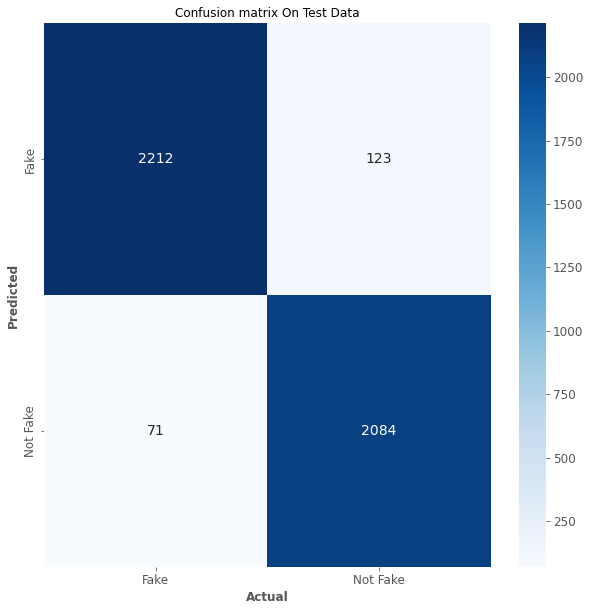

Accuracy: 95.68

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2335
           1       0.94      0.97      0.96      2155

    accuracy                           0.96      4490
   macro avg       0.96      0.96      0.96      4490
weighted avg       0.96      0.96      0.96      4490

Wall time: 363 ms


In [14]:
%%time
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.01)

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred_NB = nb_classifier.predict(tfidf_test)

cm = confusion_matrix(y_test, pred_NB)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, pred_NB)*100,2)))
print()
print(classification_report(y_test, pred_NB))

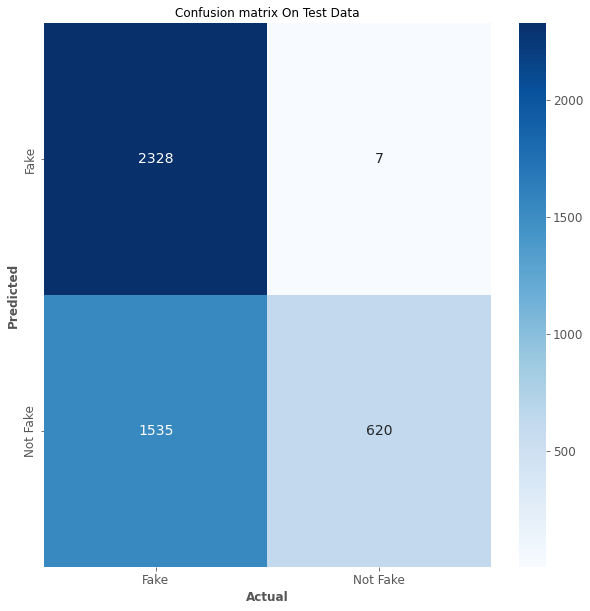

Accuracy: 65.66

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2335
           1       0.99      0.29      0.45      2155

    accuracy                           0.66      4490
   macro avg       0.80      0.64      0.60      4490
weighted avg       0.79      0.66      0.60      4490

Wall time: 3.13 s


In [15]:
%%time
# Create a RandomForestclassifier: RFC_classifier
RFC_classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
RFC_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred_rfc = RFC_classifier.predict(tfidf_test)

cm = confusion_matrix(y_test, pred_rfc)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, pred_rfc)*100,2)))
print()
print(classification_report(y_test, pred_rfc))

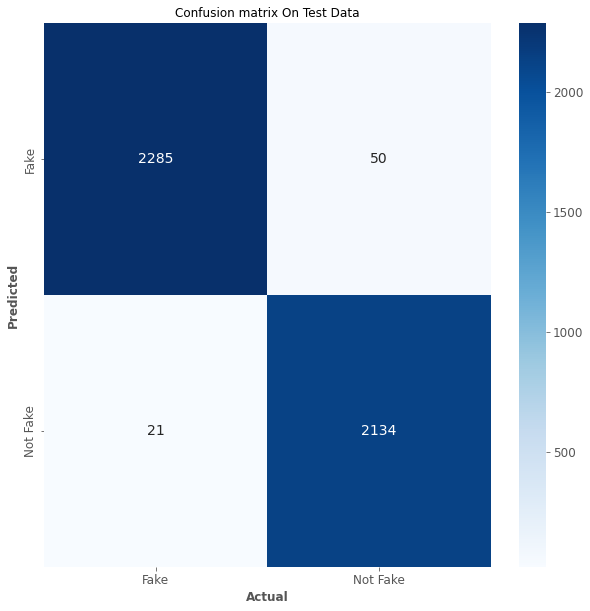

Accuracy: 98.42

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2335
           1       0.98      0.99      0.98      2155

    accuracy                           0.98      4490
   macro avg       0.98      0.98      0.98      4490
weighted avg       0.98      0.98      0.98      4490

Wall time: 1.49 s


In [16]:
%%time
rdg_clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
rdg_clf.fit(tfidf_train, y_train)
pred_rdg = rdg_clf.predict(tfidf_test)

cm = confusion_matrix(y_test, pred_rdg)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, pred_rdg)*100,2)))
print()
print(classification_report(y_test, pred_rdg))

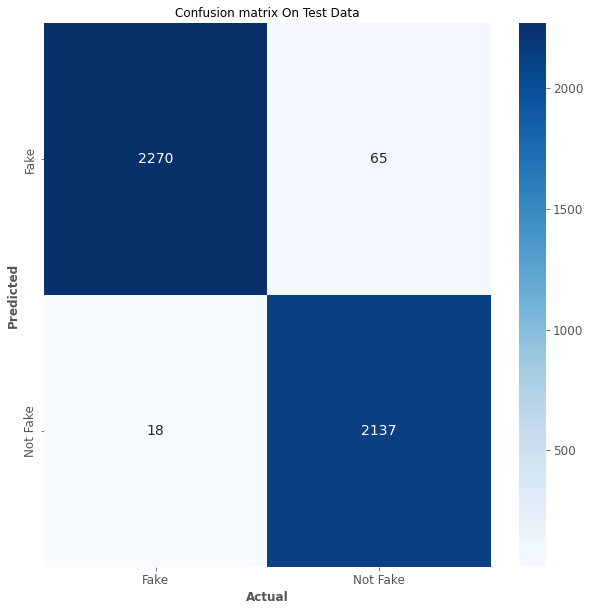

Accuracy: 98.15

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2335
           1       0.97      0.99      0.98      2155

    accuracy                           0.98      4490
   macro avg       0.98      0.98      0.98      4490
weighted avg       0.98      0.98      0.98      4490

Wall time: 417 ms


In [17]:
%%time
pcp_clf = Perceptron(max_iter=50)
pcp_clf.fit(tfidf_train, y_train)
pred_pcp = pcp_clf.predict(tfidf_test)

cm = confusion_matrix(y_test, pred_pcp)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, pred_pcp)*100,2)))
print()
print(classification_report(y_test, pred_pcp))

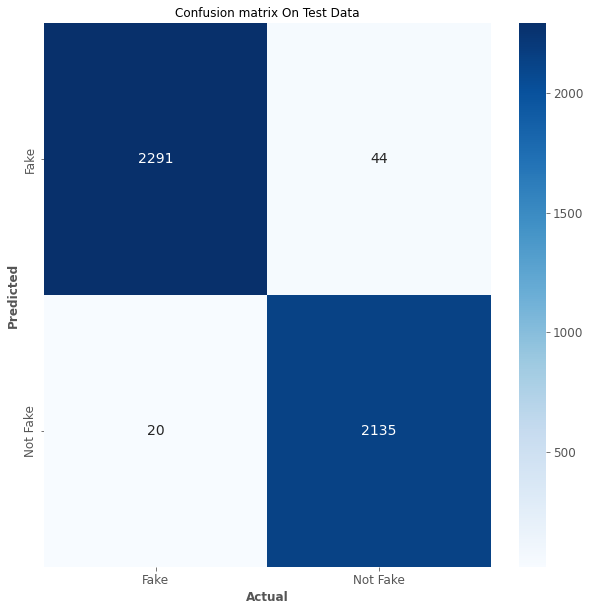

Accuracy: 98.57

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2335
           1       0.98      0.99      0.99      2155

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490

Wall time: 451 ms


In [18]:
%%time
passagress_clf = PassiveAggressiveClassifier(max_iter=50)
passagress_clf.fit(tfidf_train, y_train)
passag_pred = passagress_clf.predict(tfidf_test)

cm = confusion_matrix(y_test, passag_pred)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, passag_pred)*100,2)))
print()
print(classification_report(y_test, passag_pred))

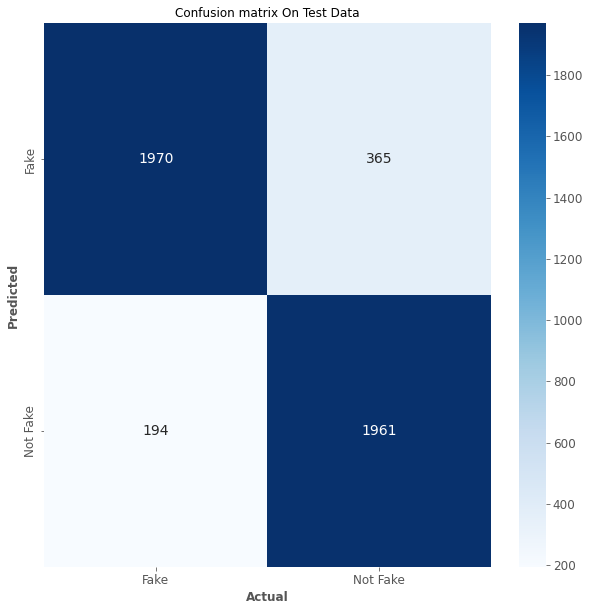

Accuracy: 87.55

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      2335
           1       0.84      0.91      0.88      2155

    accuracy                           0.88      4490
   macro avg       0.88      0.88      0.88      4490
weighted avg       0.88      0.88      0.88      4490

Wall time: 5.11 s


In [19]:
%%time
kneigh_clf = KNeighborsClassifier(n_neighbors=10)
kneigh_clf.fit(tfidf_train, y_train)
kneigh_pred = kneigh_clf.predict(tfidf_test)

cm = confusion_matrix(y_test, kneigh_pred)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, kneigh_pred)*100,2)))
print()
print(classification_report(y_test, kneigh_pred))

## Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters.

For both C and $\sigma$, it is suggested to try the following values (0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). 

Function *dataset3Params* tries all possible pairs of values for C and  $\sigma$. For example, for the 8 values listed above, a total of 8^2 = 64 different models will be trained and evaluated (on the validation set).

To generate the sets for hyperparameter tuning, stratified 10-Folds Cross Validation methods from sklearn will be used.
The performance metrics to choose the best parameters are the Learning and ROC/AUC curves.

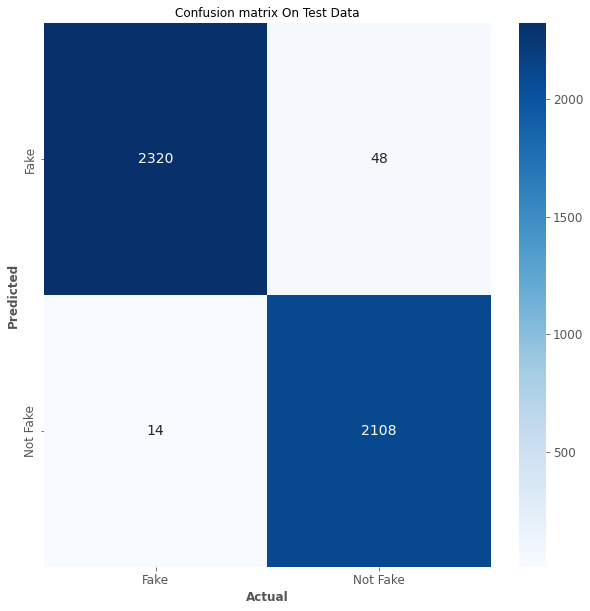

Accuracy: 98.62

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2368
           1       0.98      0.99      0.99      2122

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490

Wall time: 6min 37s


In [22]:
%%time
k10 = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
classifier = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=k10, dual=False, penalty='l2', tol=0.0001, max_iter=100, class_weight=None, n_jobs=-1)
classifier.fit(tfidf_train, y_train)
y_pred_LR = classifier.predict(tfidf_test)
cm = confusion_matrix(y_test, y_pred_LR)

new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_LR)*100,2)))
print()
print(classification_report(y_test, y_pred_LR))

### Feature Engineering: (Optimization)

One way of optimizing the data and models is by reducing the size of our dataset without hampering model performance.

A method of achieving optimization is with truncated single value decomposition.

In [13]:
tSVD = TruncatedSVD(n_components=100, algorithm='arpack', random_state=None)
Xmin = tSVD.fit_transform(tfidf_train)

### Compute Loss function 

Recall that the Logistic Regression model is defined as:    $h_{\theta}(x^{(i)})=  \frac{1}{1+e^{-\theta (x^{(i)})}}$

The cost function in Logistic Regression is: $J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$

The gradient of $J(\theta)$ is a vector of the same length as $\theta$  where the jth element (for j = 0, 1,…. n) is defined as:
$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

Complete function *costFunction* to return $J(\theta)$ and the gradient ((partial derivative of $J(\theta)$ with respect to each $\theta$) for logistic regression. 


In [31]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 15),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

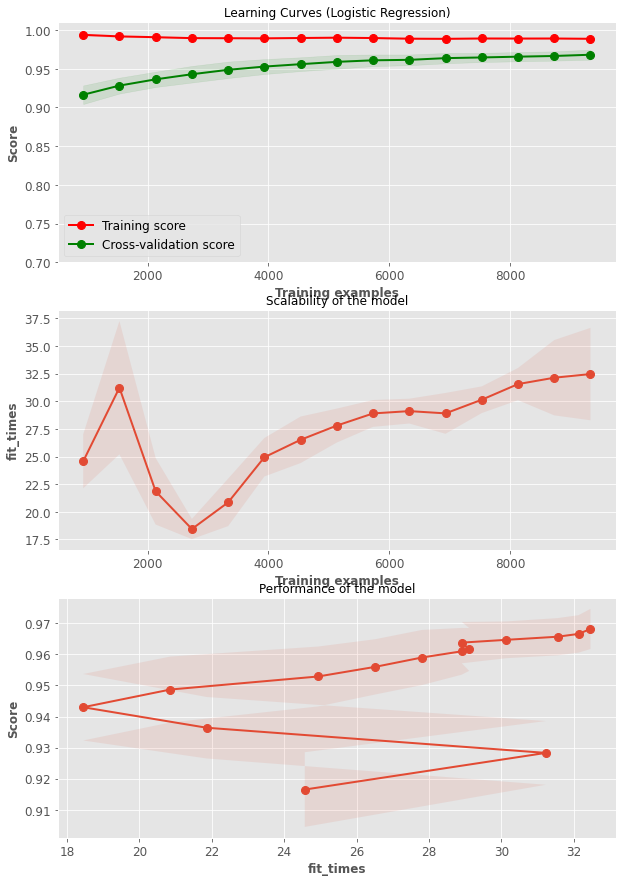

Wall time: 13min 1s


In [32]:
%%time
if __name__ == "__main__":
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    title = "Learning Curves (Logistic Regression)"
    # 15-Folds Cross validation learning curve:
    estimator = LogisticRegression()
    curves_plot = plot_learning_curve(estimator, title, tfidf_train, y_train,axes=axes, ylim=(0.7, 1.01), cv=15, n_jobs=-1)
    plt.show()

### "Brute force" method for achieving hyper-parameter optimization (similar to GridSearch):

### Note: GridSearchCV algorithm is in another file named Pipeline1!

# ROC/AUC curve example using the sparse matrix representation:

In [3]:
# Plot the ROC/AUC curve for the LinearSVC example:
from sklearn.metrics import RocCurveDisplay

classifier = LinearSVC(dual=True, max_iter=200)
y_pred_LSVC = classifier.fit(tfidf_train, y_train).decision_function(tfidf_test)

RocCurveDisplay.from_predictions(y_test, y_pred_LSVC)
plt.show()

NameError: name 'LinearSVC' is not defined

## ROC, AUC curves example failed because can't handle sparse matrix!!!

In [ ]:
%%time
if __name__ == "__main__":
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    classifier = LinearSVC()

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()

In [ ]:
# "Brute force" methods for achieving hyper-parameter optimization (similar to GridSearch):

# Note: GridSearchCV algorithm is in another file!